In [144]:
import pandas as pd
import numpy as np
# package with hypothesis tests
import scipy.stats as st
import matplotlib.pyplot as plt

<ipython-input-145-d81c76f663d7>:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show();


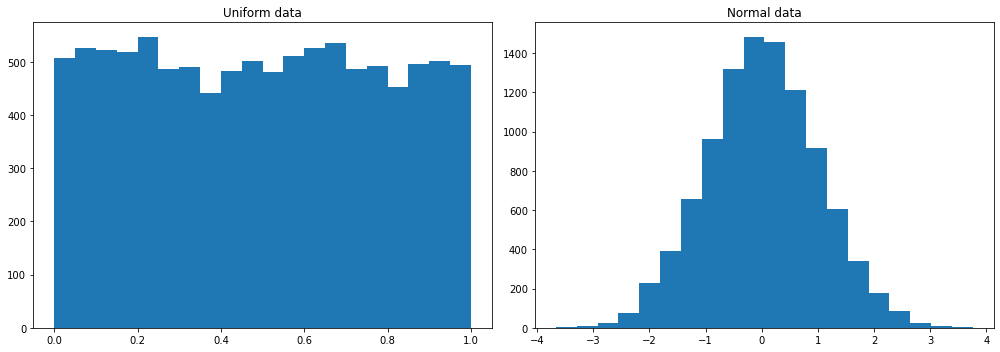

In [145]:
#
uniform = np.random.rand(10000)
normal = np.random.randn(10000)

fig = plt.figure(figsize=(14,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.hist(uniform, 20)
ax1.set_title('Uniform data')
ax2.hist(normal, 20)
ax2.set_title('Normal data')
fig.tight_layout()
fig.show();

In [146]:
normal_test = st.shapiro(normal)
uniform_test = st.shapiro(uniform)
print(normal_test)
print(uniform_test)

ShapiroResult(statistic=0.9997967481613159, pvalue=0.4874193072319031)
ShapiroResult(statistic=0.9536301493644714, pvalue=0.0)


### CLT - simulation

### How many samples do we have to take, so the distribution of means of these samples will pass the shapiro-wilk test for normality if population is from Uniform or Normal distribution?
+ Suppose the population is 10000 observation.
+ Suppose sample size is always 50

We will be suprised to see how fast the test passes for both distributions.

In [217]:
from numpy import mean
from numpy.random import randint

def get_normal_means():
    normal_means = []
    normal_sum = 0
    for i in range(50):
        val = normal[randint(0,len(normal))]
        normal_sum += val
    normal_mean = normal_sum / 50
    normal_means.append(normal_mean)
    return normal_means

the_means = []
for i in range(15):
    sample_mean = get_normal_means()
    the_means.append(sample_mean)
normal_stat, normal_p = st.shapiro(the_means) #shaprio needs at least 3 elements in the array
print(normal_p)
#once in a while with enough samples you get a low enough p value

0.032218433916568756


In [232]:
uniform_sum = 0
uniform_means = []

def get_uniform_means():
    uniform_means = []
    uniform_sum = 0
    for i in range(50):
        val = uniform[randint(0,len(uniform))]
        uniform_sum += val
    uniform_mean = uniform_sum / 50
    uniform_means.append(uniform_mean)
    return uniform_means
uni_means = []
for i in range(10):
    uni_sample = get_uniform_means()
    uni_means.append(uni_sample)
uni_shapiro = st.shapiro(uni_means)
uni_shapiro
#looks like we got one around 10 samples

ShapiroResult(statistic=0.8118868470191956, pvalue=0.020212074741721153)